# Linear Algebra with Examples Using Numpy

In [1]:
import numpy as np
import scipy.spatial.distance as spd
from numpy.random import randn as randn
from numpy.random import randint as randint
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Objectives
* Understand basic vector and matrix properties
 * Shape
 * Norm / Length
 * Span
 * Linear Dependence
* Understand basic vector and matrix operations
 * Dot product
 * Scalar addition
 * Scalar multiplication
 * Transpose
 * Euclidean distance
 * Cosine
* Invertability
* Determinant
 * Scaling factor of area
 * Determinant 0 means a decrease in dimensionality
 * A sign of linear dependance (duplicate data)
* Eigenvectors and Eigenvalues


## Linear Algebra and Machine Learning


* Regression problems: linear, logistic, etc...
    * Reduces to solving either a single, or multiple systems of equations.
* Ranking web pages
    * Solved as the problem of finding the eigenvector of the page score matrix, which is solved either as systems of equations, or an iterative multiplication algorithm.
* Dimensionality reduction - Principal Component Analysis
    * Again, eigenvalues.
* Recommendation systems
    * Use singular value decomposition (SVD, a matrix factorization) to break down user-movie into user-feature and movie-feature matrices, keeping only the top $k$-ranks to identify the best matches.
* Topic modeling
    * Extensive use of SVD and matrix factorization can be found in Natural Language Processing, specifically in topic modeling and semantic analysis.

## Vectors

A **vector** is an array of real numbers

$$\boldsymbol{x} = [x_1, x_2, \ldots, x_n]$$

In [34]:
x = np.array([1, 2, 3, 4])
print(x)
print(x.shape)

[1 2 3 4]
(4,)


In [35]:
x2 = x.reshape(-1, 1)
x2

array([[1],
       [2],
       [3],
       [4]])

In [36]:
x2.shape

(4, 1)

In [37]:
print(x2.T)
print(x2.T.shape)

[[1 2 3 4]]
(1, 4)


In [38]:
print(x)
print(x.T)
print(x.T.shape)

[1 2 3 4]
[1 2 3 4]
(4,)


In [39]:
foo = np.array([[3,4],[7,1]])
foo

array([[3, 4],
       [7, 1]])

In [40]:
foo.reshape(1,4)

array([[3, 4, 7, 1]])

In [41]:
foo.reshape(4,1)

array([[3],
       [4],
       [7],
       [1]])

In [42]:
foo.reshape(-1,1)

array([[3],
       [4],
       [7],
       [1]])

## Geometrically, a vector specifies the coordinates of the tip of the vector if the tail were placed at the origin

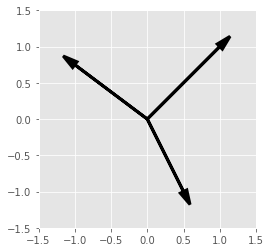

In [43]:
fig, ax = plt.subplots()

def plot_arrow_from_origin(ax, x, color="black"):
    xlim = ax.get_xlim()
    new_xlim = [0, 0]
    new_xlim[0] = np.min([xlim[0], x[0] - 0.5])
    new_xlim[1] = np.max([xlim[1], x[0] + 0.5])
    ax.set_xlim(new_xlim)
    ylim = ax.get_ylim()
    new_ylim = [0, 0]
    new_ylim[0] = np.min([ylim[0], x[1] - 0.5])
    new_ylim[1] = np.max([ylim[1], x[1] + 0.5])
    ax.set_ylim(new_ylim)
    ax.set(adjustable='box-forced', aspect='equal')
    ax.arrow(0, 0, x[0], x[1],
             head_width=0.1, linewidth=3, head_length=0.2,
             fc=color, ec=color)
    
plot_arrow_from_origin(ax, (1, 1))
plot_arrow_from_origin(ax, (0.5, -1))
plot_arrow_from_origin(ax, (-1, 0.75))

Adding a constant to a vector adds the constant to each element


$$a + \boldsymbol{x} = [a + x_1, a + x_2, \ldots, a + x_n]$$

In [44]:
a = 4
print(x)
print(x + a)

[1 2 3 4]
[5 6 7 8]


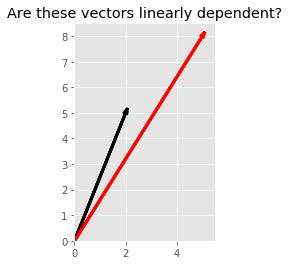

In [45]:
v = np.array([2,5])
s = 3

fig, ax = plt.subplots()
plot_arrow_from_origin(ax, (v))
plot_arrow_from_origin(ax, (v + s), color='r')
ax.set_title("Are these vectors linearly dependent?")
plt.show()

Multiplying a vector by a constant multiplies each term by the constant.

$$a \boldsymbol{x} = [ax_1, ax_2, \ldots, ax_n]$$

Any operation can be used this way on numpy arrays and numbers. 

In [46]:
print(a)
print(x)
print(a * x)

4
[1 2 3 4]
[ 4  8 12 16]


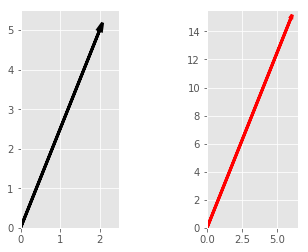

In [47]:
v = np.array([2,5])
s = 3

fig, ax = plt.subplots(1,2)
plot_arrow_from_origin(ax[0], (v))
plot_arrow_from_origin(ax[1], (v * s), color='r')

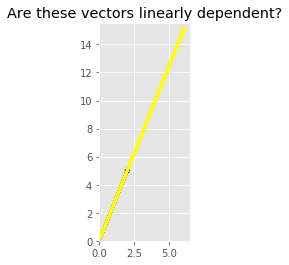

In [48]:
v = np.array([2,5])
s = 3

fig, ax = plt.subplots()
plot_arrow_from_origin(ax, (v))
plot_arrow_from_origin(ax, (v * s), color='yellow')
ax.set_title("Are these vectors linearly dependent?")
plt.show()

The **norm** or **length of a vector** $\mathbf{x}$ is defined by using the pythagorean theorem

$$||\boldsymbol{x}|| = \sqrt{x_1^2 + x_2^2 + \cdots + x_n^2}$$


In [49]:
print(x)
print(x**2)
print(np.sqrt(np.sum(x**2)))
print(np.linalg.norm(x))

[1 2 3 4]
[ 1  4  9 16]
5.477225575051661
5.477225575051661


  
And a **unit vector** is one for which

$$||\boldsymbol{x}|| = 1 $$

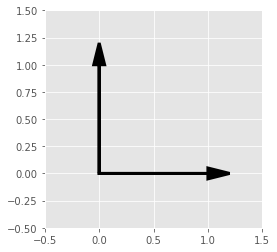

In [50]:
fig, ax = plt.subplots()
plot_arrow_from_origin(ax, (1,0))
plot_arrow_from_origin(ax, (0,1))

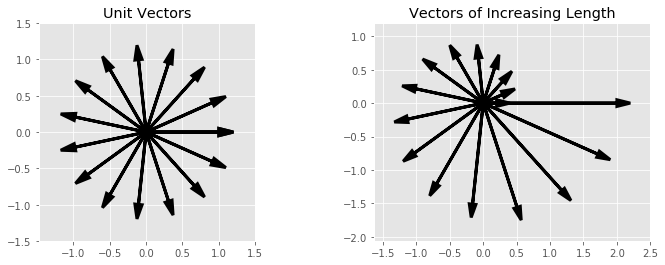

In [51]:
def unit_vector_from_angle(angle):
    return np.array([np.cos(angle), np.sin(angle)])

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

angles = np.linspace(0, 2*np.pi, num=16)
for angle in angles:
    plot_arrow_from_origin(axs[0], unit_vector_from_angle(angle))
axs[0].set_title("Unit Vectors")
    
scales = np.linspace(0.2, 2, num=16)
for angle, scale in zip(angles, scales):
    plot_arrow_from_origin(axs[1], scale*unit_vector_from_angle(angle))
axs[1].set_title("Vectors of Increasing Length");

### Dot Products and Angles Between Vectors

If we have two vectors $\boldsymbol{x}$ and $\boldsymbol{y}$ of the same length $(n)$, then the _dot product_ is given by

$$\boldsymbol{x} \cdot \boldsymbol{y} = x_1y_1 + x_2y_2 + \cdots + x_ny_n$$

In [52]:
y = np.array([4, 3, 2, 1])
print(x)
print(y)
np.dot(x,y)

[1 2 3 4]
[4 3 2 1]


20

## The dot product of two vectors is a scalar.

The dot product looks like a strange thing, but it is important because it allows you to easily communicate the **angle between two vectors**.

The **cosine of the angle between the two vectors** can be computed by the following formula:

$$cos(\theta) = \frac{\boldsymbol{x} \cdot \boldsymbol{y}}{||\boldsymbol{x}|| \text{ } ||\boldsymbol{y}||}$$



In [53]:
x = np.array([1, 2, 3, 4])
y = np.array([5, 6, 7, 8])
np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

0.9688639316269662

In [54]:
np.linalg.norm(x)

5.477225575051661

In [55]:
x.dot(y)

70

In [56]:
np.dot(x.reshape(-1,1).T, y.reshape(-1,1))

array([[70]])

In [57]:
np.dot(x.reshape(-1,1).T, y.reshape(-1,1))[0,0]

70

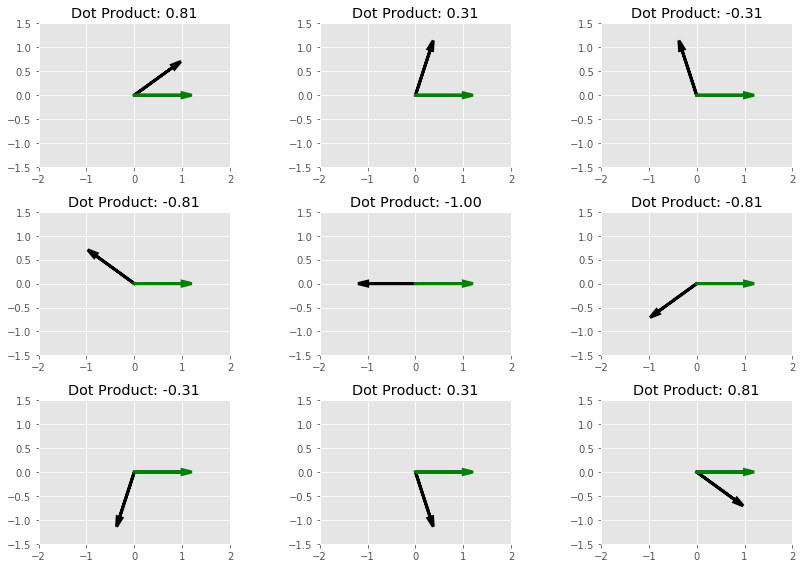

In [58]:
fig, axs = plt.subplots(3, 3, figsize=(12, 8))

angles = np.linspace(0, 2*np.pi, num=11)
for ax, angle in zip(axs.flatten(), angles[1:-1]):
    v = unit_vector_from_angle(angle)
    plot_arrow_from_origin(ax, v)
    ax.set_xlim((-2, 2)); ax.set_ylim(-1.5, 1.5)
    plot_arrow_from_origin(ax, (1, 0), color="green")
    
    dot_prod = np.dot((1, 0), v)
    ax.set_title("Dot Product: {:2.2f}".format(dot_prod))
    
plt.tight_layout()

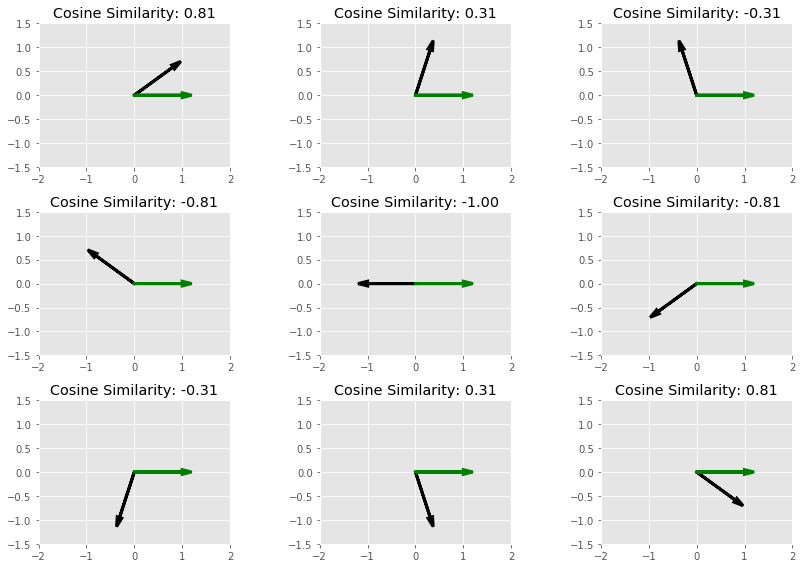

In [60]:
fig, axs = plt.subplots(3, 3, figsize=(12, 8))

angles = np.linspace(0, 2*np.pi, num=11)
for ax, angle in zip(axs.flatten(), angles[1:-1]):
    v = unit_vector_from_angle(angle)
    plot_arrow_from_origin(ax, v)
    ax.set_xlim((-2, 2)); ax.set_ylim(-1.5, 1.5)
    plot_arrow_from_origin(ax, (1, 0), color="green")
    
    cos = 1 - spd.cosine((1, 0), v)
    ax.set_title("Cosine Similarity: {:2.2f}".format(cos))
    
plt.tight_layout()

## If $\boldsymbol{x} \cdot \boldsymbol{y} = 0$ then $\boldsymbol{x}$ and $\boldsymbol{y}$ are *orthogonal* (aligns with the intuitive notion of perpendicular)

In [61]:
w = np.array([1, 2])
v = np.array([-2, 1])
np.dot(w, v)

0

A picture shows that these are perpendicular.

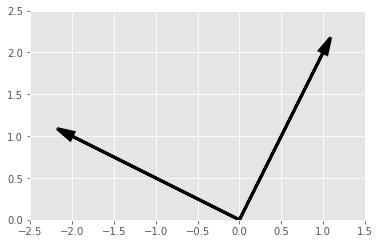

In [62]:
fig, ax = plt.subplots()

plot_arrow_from_origin(ax, (1, 2))
plot_arrow_from_origin(ax, (-2, 1))

The square of the norm of a vector is just the vector dot product with itself
$$
||\boldsymbol{x}||^2 = \boldsymbol{x} \cdot \boldsymbol{x}
$$

OR...  
The square root of the vector dot product with itself is the norm of the vector
$$
||\boldsymbol{x}|| = \sqrt{\boldsymbol{x} \cdot \boldsymbol{x}}
$$

In [63]:
print(np.linalg.norm(x)**2)
print(np.dot(x, x))

30.0
30


The **distance between two vectors** is the norm of the difference.

$$
d(\boldsymbol{x},\boldsymbol{y}) = ||\boldsymbol{x}-\boldsymbol{y}||
$$

In [59]:
p = np.array([4,6])
q = np.array([1,2])
print(p - q)
print(np.linalg.norm(p - q))

[3 4]
5.0


In [60]:
print(x)
print(y)
np.linalg.norm(x - y)

[1 2 3 4]
[5 6 7 8]


8.0

In [61]:
# np.dot(x.reshape(-1,1), y.reshape(-1,1))

In [62]:
np.dot(y.reshape(1,4), x.reshape(-1,1))

array([[70]])

### Linear Combinations of Vectors

If we have two vectors $\boldsymbol{x}$ and $\boldsymbol{y}$ of the same length $(n)$, then

$$\boldsymbol{x} + \boldsymbol{y} = [x_1+y_1, x_2+y_2, \ldots, x_n+y_n]$$

In [63]:
x = np.array([1, 2, 3, 4])
y = np.array([5, 6, 7, 8])
print(x + y)

[ 6  8 10 12]


Geometrically, this adds vectors with the **parallelogram rule**:

![](parallelogram-rule.gif)

A **linear combination** of a collection of vectors $(\boldsymbol{x}_1,
                                                    \boldsymbol{x}_2, \ldots,
                                                    \boldsymbol{x}_m)$ 
is a vector of the form

$$a_1 \cdot \boldsymbol{x}_1 + a_2 \cdot \boldsymbol{x}_2 + 
\cdots + a_m \cdot \boldsymbol{x}_m$$

That is, **a linear combination is formed out of a collection of vectors by multiplying them by various constants, and then adding the results.**

In [64]:
a1=2
x1 = np.array([1, 2, 3, 4])
print("a1*x1 = {}".format(a1*x1))
a2=4
x2 = np.array([5, 6, 7, 8])
print("a2*x2 = {}".format(a2*x2))
print("a1*x1 + a2*x2 = {}".format(a1*x1 + a2*x2))

a1*x1 = [2 4 6 8]
a2*x2 = [20 24 28 32]
a1*x1 + a2*x2 = [22 28 34 40]


Geometrically, all of the linear combinations of a collection of vectors trace out the **span of those vectors**.  

The **span** of two 2-D vectors wich are linearly independent is a **plane**.

The **span** of three 3-D vectors which are linearly independent is **three-dimensional space**.


![](linear-combination-plane.png)

# Matrices

An **$n \times p$ matrix** is an array of numbers with $n$ rows and $p$ columns:

$$
X =
  \begin{bmatrix}
    x_{11} & x_{12} & \cdots & x_{1p} \\
    x_{21} & x_{22} & \cdots & x_{2p} \\
    \vdots & \vdots & \ddots & \vdots \\
    x_{n1} & x_{n2} & \cdots & x_{np} 
  \end{bmatrix}
$$

Often in data science, matricies are used as a low level representation of a data set.  In this context:

- $n$ = number of rows = the number of observations  
- $p$ = number of columns = the number of features

### Matrices in Numpy

In `numpy` matricies and vectors are both represented as `numpy.array`s.

  - A vector is a **1-dimensional** array.
  - A matrix is a **2-dimensional** array.

For example, the following $2 \times 3$ matrix
$$
X =
  \begin{bmatrix}
    1 & 2 & 3\\
    4 & 5 & 6
  \end{bmatrix}
$$

Can be created using numpy as:

In [70]:
L = [[1, 2, 3], [4, 5, 6]]
X = np.array(L)
print(X)

[[1 2 3]
 [4 5 6]]


The `shape` attribute now tells us the number of rows and columns

In [71]:
print(X.shape)

(2, 3)


### Basic Arithmetic


Let $X$ and $Y$ be matrices **of shape $n \times p$** (i.e. of **the same shape**).

We often use $x_{ij}$ $y_{ij}$ for $i=1, 2, \ldots, n$ and $j=1, 2, \ldots, p$ denote the entries of the matrix.

1. $X+Y$ is the matrix whose $(i,j)^{th}$ entry is $x_{ij} + y_{ij}$.  That is, the **matrix created by adding entry-by-entry**.
2. $X-Y$ is the matrix whose $(i,j)^{th}$ entry is $x_{ij} - y_{ij}$ That is, the **matrix created by subtracting entry-by-entry**.
3. $aX$, where $a$ is any real number, is the matrix whose $(i,j)^{th}$ entry is $ax_{ij}$. That is, the **matrix created by multiplying every entry by $a$**.

In [72]:
X = np.array([[1, 2, 3], [4, 5, 6]])
print("X = \n{}".format(X))
print()

Y = np.array([[7, 8, 9], [10, 11, 12]])
print("Y = \n{}".format(Y))
print()

print("X + Y = \n{}".format(X + Y))

X = 
[[1 2 3]
 [4 5 6]]

Y = 
[[ 7  8  9]
 [10 11 12]]

X + Y = 
[[ 8 10 12]
 [14 16 18]]


In [73]:
X = np.array([[1, 2, 3], [4, 5, 6]])
print("X = \n{}".format(X))
print()

Y = np.array([[7, 8, 9], [10, 11, 12]])
print("Y = \n{}".format(Y))
print()

print("X - Y = \n{}".format(X - Y))

X = 
[[1 2 3]
 [4 5 6]]

Y = 
[[ 7  8  9]
 [10 11 12]]

X - Y = 
[[-6 -6 -6]
 [-6 -6 -6]]


In [79]:
m = np.dot(X.T, Y)**2

In [80]:
X = np.array([[1, 2, 3], [4, 5, 6]])
print("X = \n{}".format(X))
print()

a=5
print("5X = \n{}".format(a*X))

X = 
[[1 2 3]
 [4 5 6]]

5X = 
[[ 5 10 15]
 [20 25 30]]


### Systems of Linear Equations

Matrices were invented in the context of **systems of linear equations**.

A system of linear equations is a collection of equations like:

\begin{align*}
    a_{11}x_1 + \cdots + a_{1n}x_n &= b_1 \\
    a_{21}x_1 + \cdots + a_{2n}x_n &= b_2 \\
    \vdots \hspace{1in} \vdots \\
    a_{m1}x_1 + \cdots + a_{mn}x_n &= b_m 
\end{align*}

So for example:

\begin{align*}
    2 x_1 - x_2 = 4 \\
    x_1 + 6 x_2 = 0
\end{align*}

**The most important thing for us to be able to compute is solutions to systems of linear equations**.

We can represent the system above as a matrix and a vector:

$$ \
\text{LHS} =   \begin{bmatrix}
    2 & -1 \\
    1 & 6
  \end{bmatrix},
\
\text{RHS} = [4, 0],
\
\text{SOL} = [x1, x2]
$$

We can solve systems of linear equations in `numpy` by using `np.linalg.solve`

In [65]:
M = np.array([[2, -1], [1, 6]])
b = np.array([4, 0])

x1, x2 = np.linalg.solve(M, b)
print("x1 = {:2.2f}".format(x1))
print("x2 = {:2.2f}".format(x2))
print("2*x1 - x2 = {:2.2f}".format(2*x1 - x2))
print("x1 + 6*x2 = {:2.2f}".format(x1 + 6*x2))

x1 = 1.85
x2 = -0.31
2*x1 - x2 = 4.00
x1 + 6*x2 = 0.00


### Matrix Multiplication

**Matrix Multiplication** was invented to describe how solutions to systems of linear equations are related to each other.

Suppose we have two systems of equations, where the right hand side of the second is equal to the solutions to the first.

**First Equation:**

\begin{align*}
    2 x_1 - x_2 = 4 \\
    x_1 + 6 x_2 = 0
\end{align*}

**Second Equation:**

\begin{align*}
    y_1 + y_2 = x_1 \\
    2 y_1 - 3 y_2 = x_2
\end{align*}

Then we can substitute the second equation **into** the first to get a **single** system of equations for $y$:

\begin{align*}
    (2 \times 1 + (-1) \times 2) y_1 + (2 \times 1 + (-1) \times (-3)) y_2 = 4 \\
    ((1) \times (1) + (6) \times (2)) y_1 + ((1) \times (1) + (6) \times (-3) ) y_2 = 0
\end{align*}

The coefficients in this new equation are an example of **matrix multiplication**

$$
\begin{bmatrix}
    2 & -1 \\
    1 & 6
\end{bmatrix}
\begin{bmatrix}
    1 & 1 \\
    2 & -3
\end{bmatrix} = 
\begin{bmatrix}
    (2)(1) + (-1)(2) & (2)(1) + (-1)(-3) \\
    (1)(1) + (6)(2) & (1)(1) + (6)(-3)
\end{bmatrix}
$$

In order to multiply two matrices, they must be **conformable**: the number of columns of the first matrix must be the same as the number of rows of the second matrix.

Let $X$ be a matrix with shape $n \times k$ and let $Y$ be a matrix with shape $k \times p$, then the product $XY$ will be a matrix with shape $n \times p$ whose $(i,j)^{th}$ element is given by the dot product of the $i^{th}$ row of $X$ and the $j^{th}$ column of $Y$

$$(XY)_{i,j} = x_{i1}y_{1j} + \cdots + x_{ik}y_{kj}$$

In [66]:
X = np.array([[1, 2, 3], [4, 5, 6]])
Y = np.array([[7, 8, 9], [10, 11, 12]])

X*Y

array([[ 7, 16, 27],
       [40, 55, 72]])

In [67]:
np.dot(X,Y)

ValueError: shapes (2,3) and (2,3) not aligned: 3 (dim 1) != 2 (dim 0)

In [68]:
np.dot(X.T, Y)

array([[47, 52, 57],
       [64, 71, 78],
       [81, 90, 99]])

In [69]:
np.dot(X, Y.T)

array([[ 50,  68],
       [122, 167]])

In [70]:
X.dot(Y.T)

array([[ 50,  68],
       [122, 167]])

In [71]:
X = np.array([[2, 1, 0], [-1, 2, 3]])
print("X = \n{}".format(X))
print()

Y = np.array([[0, -2], [1, 2], [1, 1]])
print("Y = \n{}".format(Y))
print()

# Matrix multiply with dot operator
print("XY = \n{}".format(np.dot(X, Y)))

X = 
[[ 2  1  0]
 [-1  2  3]]

Y = 
[[ 0 -2]
 [ 1  2]
 [ 1  1]]

XY = 
[[ 1 -2]
 [ 5  9]]


#### Note: 

$$XY \neq YX$$

In [72]:
print("XY = \n{}".format(np.dot(X, Y)))
print()
print("YX = \n{}".format(np.dot(Y, X)))

XY = 
[[ 1 -2]
 [ 5  9]]

YX = 
[[ 2 -4 -6]
 [ 0  5  6]
 [ 1  3  3]]


Notice that $XY$ and $YX$ **do not even have the same shape**.

If $X$ and $Y$ are square matrices of the same dimension then the both the product $XY$ and $YX$ exist, but even in this case there is no guarantee the two products will be the same

### Matrix Transpose

The **transpose** of an $n \times p$ matrix is a $p \times n$ matrix with rows and columns interchanged

$$
X^T =
  \begin{bmatrix}
    x_{11} & x_{12} & \cdots & x_{1n} \\
    x_{21} & x_{22} & \cdots & x_{2n} \\
    \vdots & \vdots & \ddots & \vdots \\
    x_{p1} & x_{p2} & \cdots & x_{pn} 
  \end{bmatrix}
$$

In [73]:
print("X=\n{}\n".format(X))
print("X Transpose=\n{}\n".format(X.transpose()))
print("Or...\n{}\n".format(X.T))
print(X.shape, X.T.shape)

X=
[[ 2  1  0]
 [-1  2  3]]

X Transpose=
[[ 2 -1]
 [ 1  2]
 [ 0  3]]

Or...
[[ 2 -1]
 [ 1  2]
 [ 0  3]]

(2, 3) (3, 2)


The transpose is hard to interpret in a natural way, but it does come up often in computations.

### Vector in Matrix Form
A **column vector** is a matrix with $n$ rows and 1 column and to differentiate from a standard matrix $X$ of higher dimensions can be denoted as a bold lower case $\boldsymbol{x}$

$$
\boldsymbol{x} =
  \begin{bmatrix}
    x_{1}\\
    x_{2}\\
    \vdots\\
    x_{n}
  \end{bmatrix}
$$

In numpy, when you create a vector, it will not normally have the second dimension, so we can reshape it:

In [74]:
x = np.array([1,2,3,4])
print("x = {}".format(x))
print(x.shape)

x = [1 2 3 4]
(4,)


In [75]:
y = x.reshape(4, 1)
print("y = \n{}".format(y))
print()
print(y.shape)

y = 
[[1]
 [2]
 [3]
 [4]]

(4, 1)


and a row vector is generally written as the transpose

$$\boldsymbol{x}^T = [x_1, x_2, \ldots, x_n]$$

In [76]:
x_T = y.transpose()
print(x_T)
print(x_T.shape)
print(x)

[[1 2 3 4]]
(1, 4)
[1 2 3 4]


### Properties of Transpose
1. Let $X$ be an $n \times p$ matrix and $a$ a real number, then 
$$(cX)^T = cX^T$$
2. Let $X$ and $Y$ be $n \times p$ matrices, then
$$(X \pm Y)^T = X^T \pm Y^T$$
3. Let $X$ be an $n \times k$ matrix and $Y$ be a $k \times p$ matrix, then
$$(XY)^T = Y^TX^T$$

In [85]:
W = np.array([[1,2],[3,4]])
Q = np.array([[5,6],[7,8]])
np.dot(W, Q).T == np.dot(Q.T, W.T)

array([[ True,  True],
       [ True,  True]])

If we have two vectors $\boldsymbol{x}$ and $\boldsymbol{y}$ of the same length $(n)$, then the _dot product_ is give by matrix multiplication

$$\boldsymbol{x}^T \boldsymbol{y} =   
    \begin{bmatrix} x_1& x_2 & \ldots & x_n \end{bmatrix}
    \begin{bmatrix}
    y_{1}\\
    y_{2}\\
    \vdots\\
    y_{n}
  \end{bmatrix}  =
  x_1y_1 + x_2y_2 + \cdots + x_ny_n$$

In [86]:
x = np.array([1,2,3])
y = np.array([4,5,6])
print(x)
print(y)
print(np.dot(x.T, y))

[1 2 3]
[4 5 6]
32


### The Identity Matrix
The identity matrix $I$ is a special matrix with 1's along the diagonal and zeros elsewhere, that when multiplied by another matrix returns the same value.
$$X = XI = IX$$

In [87]:
X = np.array([[1, 2, 3], [4, 5, 6], [7 ,8 ,9]])
I = np.identity(3)
print("X = \n{}".format(X))
print()
print("I = \n{}".format(I))

X = 
[[1 2 3]
 [4 5 6]
 [7 8 9]]

I = 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [88]:
print("XI = \n{}".format(np.dot(X, I)))
print()
print("IX = \n{}".format(np.dot(I, X)))

XI = 
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]

IX = 
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


## Inverse of a Matrix

The inverse of a square $n \times n$ matrix $X$ is an $n \times n$ matrix $X^{-1}$ such that 

$$X^{-1}X = XX^{-1} = I$$

Where $I$ is the identity matrix. 

If such a matrix exists, then $X$ is said to be **invertible** or **nonsingular**, otherwise $X$ is said to be **noninvertible** or **singular**.

In [89]:
X = np.array([[1, 2, 3], [0, 1, 0], [-2, -1, 0]])
Y = np.linalg.inv(X)
print("XY = \n{}".format(np.dot(X, Y)))

XY = 
[[1.00000000e+00 0.00000000e+00 2.77555756e-17]
 [3.70074342e-17 1.00000000e+00 1.85037171e-17]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In [90]:
np.dot(X, Y).round(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Note that **only square matrices can be invertible**, even then **many square matrices do not have inverses**.

It is not too difficult to characterize exactly what matrices have inverses:

**A matrix $X$ has an inverse if and only if no column is a linear combination of the remaining columns.** This is summarized by saying that the columns are **linearly independent** and that matrix is **full rank**.

That's gist of it, but also: 
**A matrix must have a non-zero deteminant to be invertible.** 
* Determinant: Scaling factor of area after transformation
 * Determinant 0 means a decrease in dimensionality
 * A sign of linear dependance (duplicate data)

### Additional Properties of Matrices
1. **Commutative Addition:** If $X$ and $Y$ are both $n \times p$ matrices,
then $$X+Y = Y+X$$
2. **Associative Addition:** If $X$, $Y$, and $Z$ are all $n \times p$ matrices,
then $$X+(Y+Z) = (X+Y)+Z$$
3. **Associative Multiplication:** If $X$, $Y$, and $Z$ are all conformable,
then $$X(YZ) = (XY)Z$$
4. **Distributive Law on Left:** If $X$ is of dimension $n \times k$ and $Y$ and $Z$ are of dimension $k \times p$, then $$X(Y+Z) = XY + XZ$$
5. **Distributive Law on Right:** If $X$ is of dimension $p \times n$ and $Y$ and $Z$ are of dimension $k \times p$, then $$(Y+Z)X = YX + ZX$$
6. **Distributive Scalar Multiplication**: If $a$ and $b$ are real numbers, and $X$ is an $n \times p$ matrix,
then $$(a+b)X = aX+bX$$
7. **Distributive Scalar Multiplication:** If $a$ is a real number, and $X$ and $Y$ are both $n \times p$ matrices,
then $$a(X+Y) = aX+aY$$
8. **Associative & Commutative scalar multiplication:** If $a$ is a real number, and $X$ and $Y$ are conformable, then
$$X(aY) = a(XY)$$

### Properties of Inverse
1. If $X$ is invertible, then $X^{-1}$ is invertible and
$$(X^{-1})^{-1} = X$$
2. If $X$ and $Y$ are both $n \times n$ invertible matrices, then $XY$ is invertible and
$$(XY)^{-1} = Y^{-1}X^{-1}$$
3. If $X$ is invertible, then $X^T$ is invertible and
$$(X^T)^{-1} = (X^{-1})^T$$

## Eigenvectors and Eigenvalues

Vector x is an Eigenvector of matrix A iff: $$Ax = \lambda x$$  Lambda is the Eigenvalue

Eigenvector: Vector which remains within its own span after a linear transformation (multiplying by a matrix).    
Eigenvalue: Scalar by which eigenvector is scaled after transformation.

In [94]:
E = np.array([[3,1], [0,2]])
print(E)

[[3 1]
 [0 2]]


In [96]:
e_val, e_vec = np.linalg.eig(E) # eigenvectors are the columns!
print(e_val)
print(e_vec)

[3. 2.]
[[ 1.         -0.70710678]
 [ 0.          0.70710678]]


In [97]:
np.dot(E, e_vec[:,1])

array([-1.41421356,  1.41421356])

In [98]:
e_vec[:,1] * e_val[1]

array([-1.41421356,  1.41421356])

## Numpy: Vector and Matrix Indexing

### Slicing  
Start : Stop : Step  
Row, Columns

In [99]:
x = np.linspace(0, 1, num=11)
print(x)
print(x[5:])
print(x[:5])
print(x[2:8])
print(x[::2])
print(x[::-2])

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.5 0.6 0.7 0.8 0.9 1. ]
[0.  0.1 0.2 0.3 0.4]
[0.2 0.3 0.4 0.5 0.6 0.7]
[0.  0.2 0.4 0.6 0.8 1. ]
[1.  0.8 0.6 0.4 0.2 0. ]


In [100]:
M = np.linspace(0, 1, num=12).reshape(4, 3)
print(M)

[[0.         0.09090909 0.18181818]
 [0.27272727 0.36363636 0.45454545]
 [0.54545455 0.63636364 0.72727273]
 [0.81818182 0.90909091 1.        ]]


In [101]:
print(M[2:, 1:])

[[0.63636364 0.72727273]
 [0.90909091 1.        ]]


In [102]:
print(M[::2, ::2])

[[0.         0.18181818]
 [0.54545455 0.72727273]]


### Boolean Masking

In [103]:
x = np.linspace(0, 1, num=11)

logical = 10*x % 2 == 0
print(logical)

print(x[logical])

[ True False  True False  True False False False  True False  True]
[0.  0.2 0.4 0.8 1. ]


Selecting rows

In [104]:
print(M)

logical = np.array([True, False, True, False])
print(M[logical, :])

[[0.         0.09090909 0.18181818]
 [0.27272727 0.36363636 0.45454545]
 [0.54545455 0.63636364 0.72727273]
 [0.81818182 0.90909091 1.        ]]
[[0.         0.09090909 0.18181818]
 [0.54545455 0.63636364 0.72727273]]


Selecting columns

In [105]:
print(M)

logical = np.array([False, True, True])
print(M[:, logical])

[[0.         0.09090909 0.18181818]
 [0.27272727 0.36363636 0.45454545]
 [0.54545455 0.63636364 0.72727273]
 [0.81818182 0.90909091 1.        ]]
[[0.09090909 0.18181818]
 [0.36363636 0.45454545]
 [0.63636364 0.72727273]
 [0.90909091 1.        ]]


Indexing arrays with arrays of indices ("fancy indexing")

In [107]:
binary = np.array([0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0])
colors = np.array(["red", "blue"])
print(colors[binary])

['red' 'red' 'blue' 'blue' 'red' 'blue' 'blue' 'red' 'red' 'blue' 'red']


Play around!

In [108]:
foo = np.random.randint(60, size=(9,7))
foo

array([[40, 32, 17, 13, 23,  0, 12],
       [17, 22, 43, 32, 44, 38, 54],
       [43, 18, 41, 40, 57, 34, 44],
       [39, 53, 36, 41, 47, 25, 30],
       [22, 45, 31, 35, 43, 55, 41],
       [17, 47, 28, 10, 47, 30,  2],
       [54, 14,  1, 49,  3, 27, 59],
       [ 6, 50, 26, 49, 25, 55, 19],
       [31, 57,  6, 25, 32, 34, 30]])

In [109]:
foo[1:3,4:5]

array([[44],
       [57]])

In [72]:
np.random.rand(9,1)

array([[ 0.76429279],
       [ 0.26491718],
       [ 0.93267716],
       [ 0.65314625],
       [ 0.18173662],
       [ 0.08120159],
       [ 0.1523895 ],
       [ 0.7517144 ],
       [ 0.69577056]])

In [73]:
bar = np.random.rand(9,1)
bar

array([[ 0.21120019],
       [ 0.68137175],
       [ 0.69729973],
       [ 0.34741592],
       [ 0.19958725],
       [ 0.03594232],
       [ 0.80935087],
       [ 0.75394068],
       [ 0.69522308]])

In [74]:
mask = bar > .6
mask

array([[False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True]], dtype=bool)

In [75]:
bar[mask]

array([ 0.68137175,  0.69729973,  0.80935087,  0.75394068,  0.69522308])

In [76]:
ugh = mask.reshape(-1,)
ugh

array([False,  True,  True, False, False, False,  True,  True,  True], dtype=bool)

In [77]:
mask2 = foo > 23
mask2

array([[False,  True, False,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True, False,  True],
       [ True, False, False,  True,  True,  True,  True],
       [False, False,  True, False,  True, False,  True],
       [False, False,  True,  True,  True, False,  True],
       [False, False, False,  True,  True,  True, False],
       [ True,  True, False,  True,  True,  True,  True],
       [False,  True, False,  True,  True, False, False],
       [ True, False, False,  True,  True, False, False]], dtype=bool)

In [78]:
foo[mask2]

array([56, 49, 40, 55, 32, 25, 58, 51, 28, 39, 45, 53, 35, 37, 40, 36, 32,
       29, 57, 36, 25, 46, 59, 31, 45, 54, 28, 52, 40, 30, 52, 25, 51, 42,
       44, 56, 57, 43])

In [79]:
#foo[mask]

In [80]:
baz = np.random.rand(9)
baz

array([ 0.953702  ,  0.08484435,  0.73639849,  0.33977335,  0.44163791,
        0.53311188,  0.18139074,  0.12690978,  0.11946945])

In [81]:
baz.shape

(9,)

In [82]:
baz > .4

array([ True, False,  True, False,  True,  True, False, False, False], dtype=bool)

In [83]:
foo[baz > 0.4]

array([[ 9, 56,  7, 49, 40, 55, 32],
       [53, 13, 14, 35, 37, 40, 36],
       [ 5,  7, 36, 25, 46, 19, 59],
       [22,  2, 17, 31, 45, 54, 14]])

In [84]:
bar.shape

(9, 1)

In [85]:
bar.T.shape

(1, 9)

In [86]:
foo

array([[ 9, 56,  7, 49, 40, 55, 32],
       [25, 58, 51, 28, 39, 14, 45],
       [53, 13, 14, 35, 37, 40, 36],
       [22, 17, 32, 14, 29, 11, 57],
       [ 5,  7, 36, 25, 46, 19, 59],
       [22,  2, 17, 31, 45, 54, 14],
       [28, 52,  3, 40, 30, 52, 25],
       [17, 51, 10, 42, 44,  6, 22],
       [56,  6,  5, 57, 43,  4, 15]])

In [87]:
col_sum = foo.sum(axis=0)
col_sum

array([237, 262, 175, 321, 353, 255, 305])

In [88]:
col_sum.shape

(7,)

In [89]:
col_sum > 240

array([False,  True, False,  True,  True,  True,  True], dtype=bool)

In [90]:
foo[:, col_sum > 240]

array([[56, 49, 40, 55, 32],
       [58, 28, 39, 14, 45],
       [13, 35, 37, 40, 36],
       [17, 14, 29, 11, 57],
       [ 7, 25, 46, 19, 59],
       [ 2, 31, 45, 54, 14],
       [52, 40, 30, 52, 25],
       [51, 42, 44,  6, 22],
       [ 6, 57, 43,  4, 15]])